## Setup

In [1]:
from dotenv import load_dotenv
import matplotlib.pyplot as plt

load_dotenv()  # Defines KAGGLE_USERNAME and KAGGLE_KEY
%matplotlib inline
print('Setup complete')

Setup complete


## Download Data

In [2]:
import kaggle
import os

api = kaggle.api
# Kaggle requires an authentication token to access the API
# Go to your Kaggle account settings to generate an API token, which will be downloaded as a kaggle.json file
# Create a .env file and define the following environment variables...
# KAGGLE_USERNAME="your_username"
# KAGGLE_KEY="your_key"

if not os.path.isdir('./data'):
    print('Dowloading dataset...')
    api.dataset_download_files('nayanack/water-probability', path='./data', unzip=True)
    print('Complete')
else:
    print('Dataset already downloaded')

Dataset already downloaded


## Load Data

In [3]:
import pandas as pd

DATASET_DIR = '.\data\water_potability.csv'
potability_data = pd.read_csv(DATASET_DIR)
potability_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
potability_data.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [5]:
n = len(potability_data)
print(f'Number of entries: {n}')
print(f'Dataframe shape: {potability_data.shape}')

Number of entries: 3276
Dataframe shape: (3276, 10)


## Clean Data

In [6]:
# Count the number of missing values in each column
potability_data.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
# Remove rows with missing values
potability_data = potability_data.dropna()
# Switch 1/0 labels so that unsafe water samples are labeled 1 and safe water samples are labeled 0
potability_data['Unsafe'] = 1 - potability_data['Potability']
potability_data = potability_data.drop(columns='Potability')
n = len(potability_data)
print(f'Number of rows: {n}')
print(f'Dataframe shape: {potability_data.shape}')
potability_data.head()

Number of rows: 2011
Dataframe shape: (2011, 10)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Unsafe
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,1
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,1
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,1
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,1
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,1


## Split Data

In [8]:
# Train-Test split 80-20
# Separate features from labels
from sklearn.model_selection import train_test_split

X = potability_data.drop(columns='Unsafe')
y = potability_data['Unsafe']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
train_n = len(X_train)
test_n = len(X_test)
print(f'Training rows: {train_n}')
print(f'Test rows: {test_n}')
print(f'Train X data shape: {X_train.shape}')
print(f'Train y data shape: {y_train.shape}')
print(f'Test X data shape: {X_test.shape}')
print(f'Test y data shape: {y_test.shape}')
X_train.head()

Training rows: 1608
Test rows: 403
Train X data shape: (1608, 9)
Train y data shape: (1608,)
Test X data shape: (403, 9)
Test y data shape: (403,)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2155,4.981672,220.950558,20988.087806,7.985668,232.548814,373.624878,12.235175,45.950030,4.475148
3045,5.622807,194.463239,16119.340190,6.907987,336.648207,408.459081,16.364724,76.631186,3.992957
1550,8.416087,208.326022,28234.906857,7.784123,297.330528,444.560108,12.645176,78.756533,4.930084
1824,6.980727,200.467226,30862.784459,6.196276,391.666878,422.489596,9.066902,48.250468,5.437619
3244,5.836105,277.065713,17711.487774,3.458192,400.167599,456.732862,17.552294,72.059866,3.738991


## Visualize Data

In [9]:
# Print mean values for each feature column in the training data
X_train.mean()

ph                     7.104552
Hardness             196.124656
Solids             21874.781806
Chloramines            7.140099
Sulfate              332.974047
Conductivity         426.089467
Organic_carbon        14.399908
Trihalomethanes       66.428997
Turbidity              3.966356
dtype: float64

In [10]:
# Count 1 and 0 labels in training data
y_train.value_counts()

Unsafe
1    947
0    661
Name: count, dtype: int64

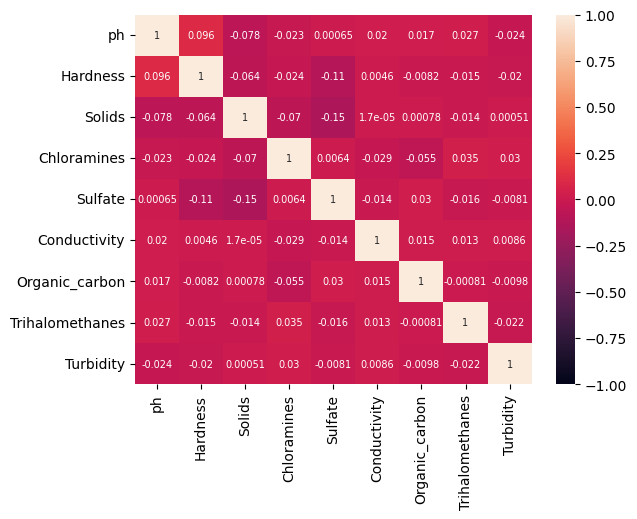

In [11]:
# Display correlation matrix between features
import seaborn as sns
corr_matrix = X_train.corr()
plt.figure()
sns.heatmap(corr_matrix, annot=True, vmin=-1.0, vmax=1.0, annot_kws={'fontsize':7})
plt.show()

As shown above, there is almost no significant correlation between a pair of different features. All off-diagonal correlations are very close to zero.

Sulfate            0.017519
Organic_carbon     0.004846
Turbidity          0.001732
ph                 0.000267
Hardness           0.000000
Solids             0.000000
Chloramines        0.000000
Conductivity       0.000000
Trihalomethanes    0.000000
Name: MI Scores, dtype: float64


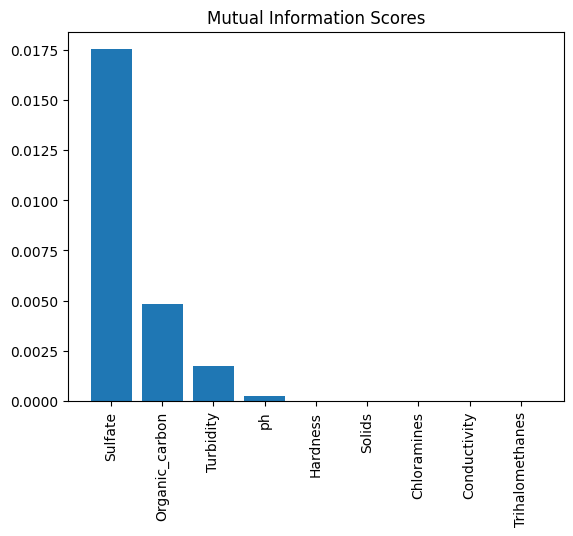

In [12]:
# Display mutual information scores between features and target
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X_train, y_train, discrete_features=False)
mi_scores = pd.Series(mi_scores, index=X_train.columns, name='MI Scores')
mi_scores = mi_scores.sort_values(ascending=False)
print(mi_scores)
plt.figure()
plt.bar(mi_scores.index, mi_scores)
plt.title('Mutual Information Scores')
plt.xticks(rotation='vertical')
plt.show()

Only 4 features have a non-zero mutual information score for the target variable. Sulfate levels have the highest mutual information, but it is only 0.0175. We can try to visualize how the distribution for this feature variable changes based on the potability.

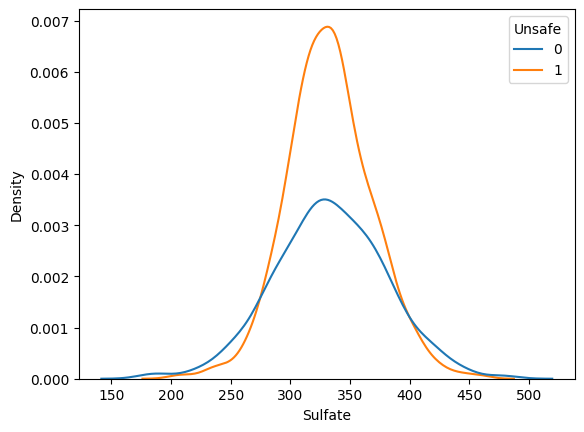

In [13]:
plt.figure()
sns.kdeplot(x=X_train['Sulfate'], hue=y_train)
plt.show()

The distribution of sulfate levels tends to be slightly more spread out when water is safe to drink, but the mean is roughly the same. This feature, by itself, does not appear to be a very useful predictor for the target variable, despite it having the highest mutual information score. Therefore, we can expect that any classifier model trying to predict the potability of a water sample based on the provided features in this dataset, will not have strong performance.

## Unsupervised Methods

### PCA

In [14]:
from sklearn.decomposition import PCA

X_train_scaled = (X_train - X_train.mean()) / X_train.std()
pca = PCA()
X_pca = pca.fit_transform(X_train_scaled)
component_names = [f'PC{i+1}' for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)
X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,1.721025,-0.265405,1.777196,1.552849,-0.147155,-0.183984,1.062727,-0.597407,1.199992
1,-0.273752,0.463004,-0.215487,-0.382025,-0.072759,-0.523525,0.384903,-1.065051,0.375971
2,0.632944,-0.709425,1.178651,-0.282692,1.033194,-0.631512,-0.762302,0.474525,-0.306820
3,0.377005,0.976270,0.316099,1.833324,0.837403,0.677243,-1.739703,-0.055884,-1.461091
4,-0.611974,-1.305073,-2.015483,0.495719,-0.180706,0.072886,-0.108561,-2.766377,-1.434994


In [15]:
# Loadings for each principal component
loadings = pd.DataFrame(pca.components_.T, index=X_train.columns, columns=component_names)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
ph,-0.320873,-0.532885,-0.056272,-0.028415,0.051909,-0.094666,-0.387047,0.668970,-0.010888
Hardness,-0.049667,-0.665402,0.192184,0.257405,-0.049081,-0.063200,0.210900,-0.417623,-0.475700
Solids,0.710374,0.078462,-0.063828,-0.125330,-0.056340,-0.048600,-0.106154,0.318976,-0.592351
Chloramines,-0.252186,0.223423,0.603095,-0.109447,0.071367,-0.114741,0.546051,0.394031,-0.197716
Sulfate,-0.557568,0.385489,-0.325219,0.055268,-0.039870,0.143040,-0.177058,-0.074420,-0.610538
Conductivity,0.038249,-0.160500,-0.209691,-0.239747,0.734972,0.517086,0.247145,0.021037,-0.047361
Organic_carbon,-0.039905,-0.051312,-0.600646,-0.077148,0.079708,-0.630754,0.469572,0.062751,0.020202
Trihalomethanes,-0.100537,-0.064615,0.186358,-0.831259,0.064856,-0.284351,-0.260972,-0.316892,-0.080044
Turbidity,0.047948,0.189816,0.216470,0.384411,0.659012,-0.452738,-0.339471,-0.103565,-0.042484


[0.13131995 0.1289127  0.12051523 0.11366319 0.11217667 0.10722851
 0.10255233 0.09803802 0.08559341]


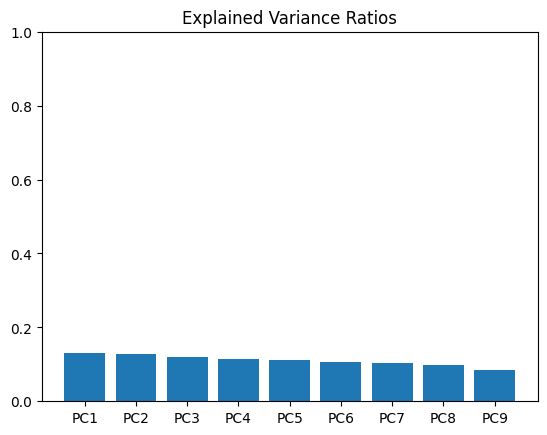

In [16]:
# Display amount of data variation captured by each component
print(pca.explained_variance_ratio_)
plt.figure()
plt.ylim(0.0, 1.0)
plt.title('Explained Variance Ratios')
plt.bar(component_names, pca.explained_variance_ratio_)
plt.show()

None of the principal components capture a significant amount of variation in the data. The first compoenent captures the most, but only represents about 13% of the variance. This is expected as the original features were already uncorrelated (see correlation matrix).

### K-means Clustering

In [17]:
# Attempt to divide data into two clusters, which might separate the safe from unsafe samples
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, n_init=10, random_state=1)
cluster_labels = kmeans.fit_predict(X_train_scaled)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, cluster_labels)
cm_df = pd.DataFrame(cm, columns=['Cluster 0', 'Cluster 1'], index=['Safe', 'Unsafe'])
cm_df

,Cluster 0,Cluster 1
Safe,315,346
Unsafe,444,503


In [18]:
# Determine how to assign labels based on cluster to maximize accuracy
acc1 = (cm[0][0] + cm[1][1]) / train_n
acc2 = (cm[1][0] + cm[0][1]) / train_n
if acc1 > acc2:
    print('Cluster 0 = Safe; Cluster 1 = Unsafe')
    print(f'Accuracy: {acc1}')
else:
    print('Cluster 11 = Safe; Cluster 0 = Unsafe')
    print(f'Accuracy: {acc2}')

Cluster 0 = Safe; Cluster 1 = Unsafe
Accuracy: 0.5087064676616916


If points assigned to Cluster 0 are considered safe and points in Cluster 1 are unsafe, we only get 50.9% accuracy, which is extremely low for a binary classifier.

In [19]:
print('Cluster centers:')
kmeans.cluster_centers_

Cluster centers:


array([[-0.30712234, -0.09429766,  0.65446365, -0.24840503, -0.44018691,
         0.05999816,  0.09542656, -0.1545002 ,  0.05308876],
       [ 0.27593873,  0.08472316, -0.5880128 ,  0.22318327,  0.39549261,
        -0.05390626, -0.08573744,  0.13881305, -0.0476984 ]])

In [20]:
# Evaulate test accuracy using same cluster approach
X_test_scaled = (X_test - X_train.mean()) / X_train.std()
test_cluster_labels = kmeans.predict(X_test_scaled)
cm = confusion_matrix(y_test, test_cluster_labels)
cm_df = pd.DataFrame(cm, columns=['Cluster 0', 'Cluster 1'], index=['Safe', 'Unsafe'])
print(f'Test Accuracy: {(cm[0][0] + cm[1][1]) / test_n}')
cm_df

Test Accuracy: 0.4813895781637717


,Cluster 0,Cluster 1
Safe,68,82
Unsafe,127,126


This clustering method also yields a poor test accuracy ~48.1%

## Supervised Methods

### Pipeline Setup

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

def create_and_train_pipeline(model, X_train=X_train, y_train=y_train):
    standard_scaler = StandardScaler()
    pipeline = Pipeline(steps=[('Scaler', standard_scaler),
                               ('Model', model)])
    pipeline.fit(X_train, y_train)
    return pipeline

def print_test_results(y_true, y_preds):
    cm = confusion_matrix(y_true, y_preds)
    cm_df = pd.DataFrame(cm, columns=['0 (Prediction)', '1 (Prediction)'], index=['0 (Actual)', '1 (Actual)'])
    print(f'Confusion matrix:\n{cm_df}')
    print(f'Accuracy: {accuracy_score(y_true, y_preds)}')
    print(f'F1-score: {f1_score(y_true, y_preds)}')

### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

logistic_reg_pipeline = create_and_train_pipeline(LogisticRegression())
logistic_reg_preds = logistic_reg_pipeline.predict(X_test)
print_test_results(y_test, logistic_reg_preds)

Confusion matrix:
            0 (Prediction)  1 (Prediction)
0 (Actual)               4             146
1 (Actual)              13             240
Accuracy: 0.6054590570719603
F1-score: 0.7511737089201878


The accuracy of the logistic regression model is about 60% and the F1-score is high (~0.75), but the model has a strong tendency to predict postive cases (unsafe samples), leading to a large number of false positives.

### SVM

In [23]:
from sklearn.svm import SVC

svm_pipeline = create_and_train_pipeline(SVC())
svm_preds = svm_pipeline.predict(X_test)
print_test_results(y_test, svm_preds)

Confusion matrix:
            0 (Prediction)  1 (Prediction)
0 (Actual)              60              90
1 (Actual)              28             225
Accuracy: 0.707196029776675
F1-score: 0.7922535211267606


The accuracy of the kernel SVM model is about 70% and the F1-score is 0.79. This model performs better on the negative cases compared to the logistic regression model, as evidenced by the decrease in the number of false positives. However, there are still more false positives than true negatives.

### Random Forest (N=10)

In [24]:
from sklearn.ensemble import RandomForestClassifier

small_random_forest_pipeline = create_and_train_pipeline(RandomForestClassifier(n_estimators=10, random_state=1))
small_random_forest_preds = small_random_forest_pipeline.predict(X_test)
print_test_results(y_test, small_random_forest_preds)

Confusion matrix:
            0 (Prediction)  1 (Prediction)
0 (Actual)              79              71
1 (Actual)              70             183
Accuracy: 0.6501240694789082
F1-score: 0.7218934911242604


The accuracy of the model is 65% and the F1-score is 0.72. While both metrics are slightly worse than those for the SVM classifier, there is a considerable decrease in the number of false positives.

### Random Forest (N=100)

In [25]:
large_random_forest_pipeline = create_and_train_pipeline(RandomForestClassifier(n_estimators=100, random_state=1))
large_random_forest_preds = large_random_forest_pipeline.predict(X_test)
print_test_results(y_test, large_random_forest_preds)

Confusion matrix:
            0 (Prediction)  1 (Prediction)
0 (Actual)              64              86
1 (Actual)              41             212
Accuracy: 0.684863523573201
F1-score: 0.7695099818511797


With an increase in the number of estimators, the accuracy increased to 68% and the F1-score increased to 0.77. However, there was an increase in the number of false positives.

### XGBoost

In [26]:
from xgboost import XGBClassifier

xgb_pipeline = create_and_train_pipeline(XGBClassifier(n_estimators=10, learning_rate=0.1, random_state=1))
xgb_preds = xgb_pipeline = xgb_pipeline.predict(X_test)
print_test_results(y_test, xgb_preds)

Confusion matrix:
            0 (Prediction)  1 (Prediction)
0 (Actual)              45             105
1 (Actual)              19             234
Accuracy: 0.6923076923076923
F1-score: 0.7905405405405405


The XGBoost classifier, with 10 estimators, yields a 69% accuracy and a 0.79 F1-score, which is better performance than the two random forest models. However, the number of false positives increased, indicating poor specificity.

## Conclusion

In [27]:
# Calculate test MCC metric for each model
from sklearn.metrics import matthews_corrcoef

all_model_predictions = {'Logistic Regression': logistic_reg_preds,
                         'SVM': svm_preds, 
                         'Small RF': small_random_forest_preds, 
                         'Large RF': large_random_forest_preds, 
                         'XGBoost': xgb_preds}
mccs = {}
for model, test_preds in all_model_predictions.items():
    mccs[model] = matthews_corrcoef(y_test, test_preds)

mccs = {k: v for k, v in sorted(mccs.items(), key=lambda item: item[1], reverse=True)}
pd.DataFrame(mccs, index=['MCC'])

,SVM,XGBoost,Large RF,Small RF,Logistic Regression
MCC,0.338532,0.297446,0.291415,0.25033,-0.05944


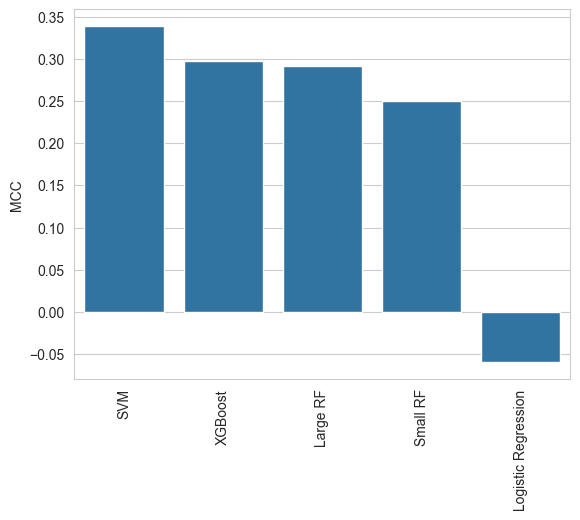

In [28]:
plt.figure()
sns.set_style('whitegrid')
plt.xticks(rotation='vertical')
plt.ylabel('MCC')
sns.barplot(mccs)
plt.show()

The SVM model had the highest MCC among all models, but it is only about 0.34 (ideal value is 1.0). As mentioned in the mutual information analysis, the feature variables do not exhibit a strong relationship with target variable. This limits how well we can predict non-potability of a water sample with this dataset. More relevant features could help improve the prediction accuracy of these models.